In this Notebook we create and sketch tools for the Agent. Building proofs of concept (PoC)

### Setup

In [1]:
# Libraries

import os

In [2]:
# Local Modules


In [3]:
# import Whisper

import whisper

In [4]:
# Import Agent

os.sys.path.append("../src")
os.sys.path.append("../src/agents")

import react  # My AI assistant

Langfuse client is disabled since no public_key was provided as a parameter or environment variable 'LANGFUSE_PUBLIC_KEY'. See our docs: https://langfuse.com/docs/sdk/python/low-level-sdk#initialize-client


In [5]:
os.sys.path.append("../src/utils")

from gaia_eval import get_agent_response, evaluate_response

In [6]:

# Import GAIA Questions
from datasets import load_dataset
import pandas as pd

gaia_questions = load_dataset(path="gaia-benchmark/GAIA", name="2023_level1")
gaia_questions = gaia_questions["validation"]  # Filter for dev purposes
gaia_df = pd.DataFrame(gaia_questions)

/home/santiagoal/.cache/pypoetry/virtualenvs/chappie-CHLGiFC_-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
gaia_df.head()

,task_id,Question,Level,Final answer,file_name,file_path,Annotator Metadata
0,e1fc63a2-da7a-432f-be78-7c4a95598703,If Eliud Kipchoge could maintain his record-ma...,1,17,,,{'Steps': '1. Googled Eliud Kipchoge marathon ...
1,8e867cd7-cff9-4e6c-867a-ff5ddc2550be,How many studio albums were published by Merce...,1,3,,,{'Steps': '1. I did a search for Mercedes Sosa...
2,ec09fa32-d03f-4bf8-84b0-1f16922c3ae4,Here's a fun riddle that I think you'll enjoy....,1,3,,,{'Steps': 'Step 1: Evaluate the problem statem...
3,5d0080cb-90d7-4712-bc33-848150e917d3,What was the volume in m^3 of the fish bag tha...,1,0.1777,,,"{'Steps': '1. Searched '""Can Hiccup Supply Eno..."
4,a1e91b78-d3d8-4675-bb8d-62741b4b68a6,In the video https://www.youtube.com/watch?v=L...,1,3,,,{'Steps': '1. Navigate to the YouTube link. 2....


---

In [8]:
filetypes = {d[1].file_path.split(".")[-1] for d in gaia_df.iterrows()}
filetypes

{'', 'docx', 'mp3', 'png', 'pptx', 'py', 'txt', 'xlsx'}

## Image Handler Tool

### Identify Image-like tasks

In [9]:
img_filetypes = ('png', 'jpg')

In [10]:
image_tasks_df = gaia_df[gaia_df["file_path"].apply(lambda row: row.split(".")[-1] in img_filetypes)]
image_tasks_df

,task_id,Question,Level,Final answer,file_name,file_path,Annotator Metadata
16,cca530fc-4052-43b2-b130-b30968d8aa44,Review the chess position provided in the imag...,1,Rd5,cca530fc-4052-43b2-b130-b30968d8aa44.png,/home/santiagoal/.cache/huggingface/hub/datase...,{'Steps': 'Step 1: Evaluate the position of th...
21,9318445f-fe6a-4e1b-acbf-c68228c9906a,"As a comma separated list with no whitespace, ...",1,"3/4,1/4,3/4,3/4,2/4,1/2,5/35,7/21,30/5,30/5,3/...",9318445f-fe6a-4e1b-acbf-c68228c9906a.png,/home/santiagoal/.cache/huggingface/hub/datase...,{'Steps': '1. Find the fractions that use / as...


In [11]:
sample_img_task = image_tasks_df.iloc[1]

### Tool POC

#### (1/2) Donut for OCR 

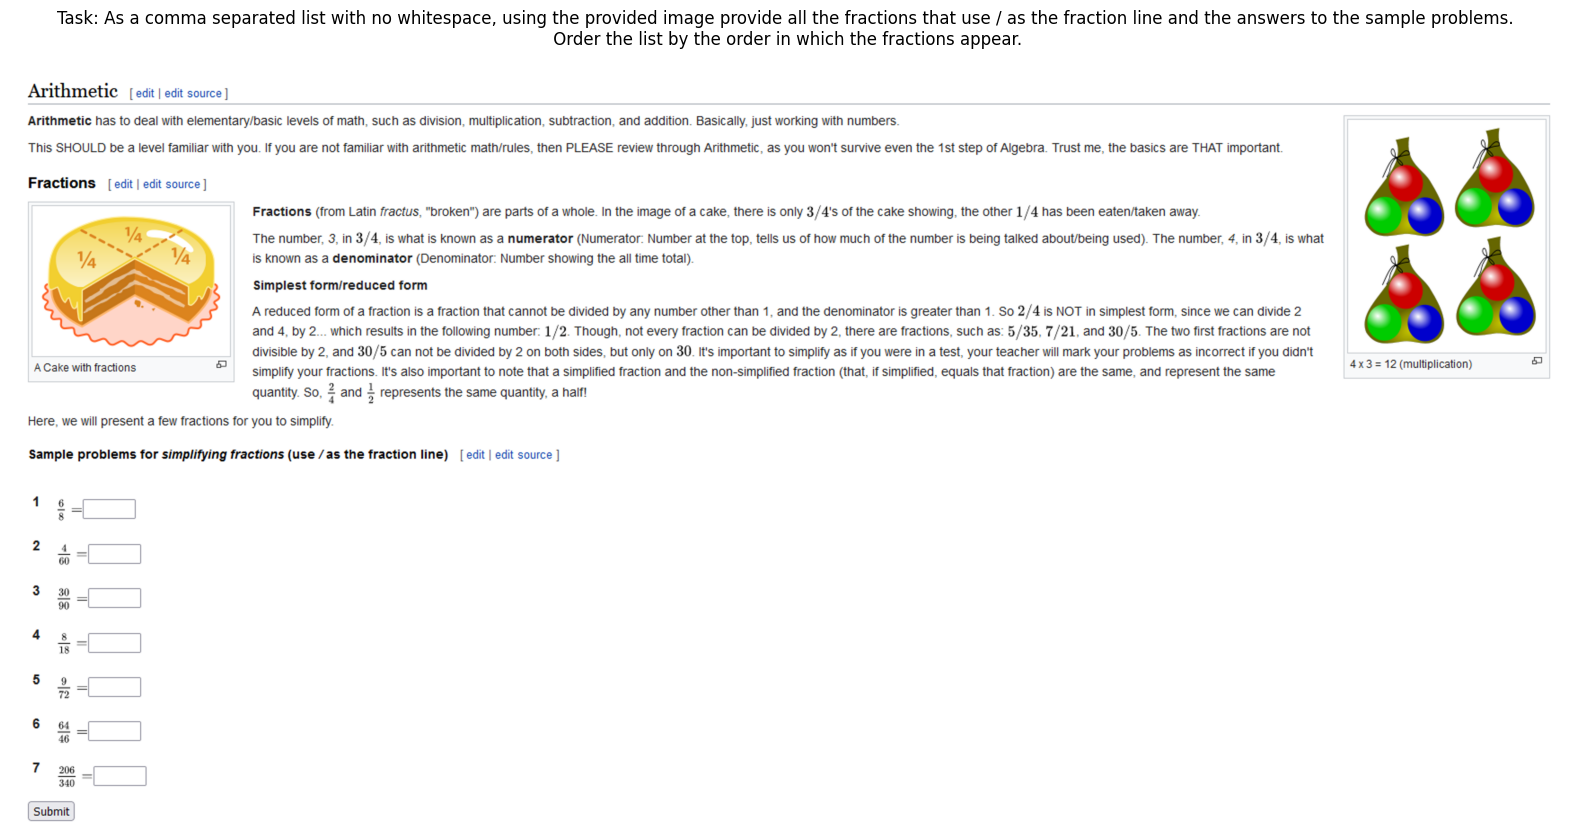

In [13]:
# Read Image
import matplotlib.pyplot as plt
from PIL import Image

img_path = sample_img_task.file_path
img = Image.open(img_path)
img = img.resize(size=(img.width * 2, img.height * 2))
task_description = sample_img_task.Question

plt.figure(figsize=(20, 10))
plt.title("Task: " + task_description.replace(".", ".\n"))
plt.imshow(img)
plt.axis("off")
plt.show()

In [16]:
import pytesseract


result = pytesseract.image_to_string(img)

In [18]:
print(result)

Arithmetic [edit | edit source]
Arithmetic has to deal with elementary/basic levels of math, such as division, multiplication, subtraction, and addition. Basically, just working with numbers.

This SHOULD be a level familiar with you. If you are not familiar with arithmetic math/rules, then PLEASE review through Arithmetic, as you won't survive even the 1st step of Algebra. Trust me, the basics are THAT important.

Fractions [edit | edit source |
Fractions (from Latin fractus, "broken") are parts of a whole. In the image of a cake, there is only 3/4's of the cake showing, the other 1/4 has been eaten/taken away.

The number, 3, in 3/4, is what is known as a numerator (Numerator: Number at the top, tells us of how much of the number is being talked about/being used). The number, 4, in 3/4, is what
is known as a denominator (Denominator: Number showing the all time total).

Simplest form/reduced form

A reduced form of a fraction is a fraction that cannot be divided by any number other t

In [ ]:
for r in results:
    print(r[1])

In [ ]:
result

In [ ]:
# Setup token processor and model

processor = DataProcessor
model = _(
    
)

In [ ]:
# Extract info from image

model.generate(
    query
    
    ids=processor.tokenizer
    tokens=512
)

In [ ]:
# Show both image and result

.batch

In [ ]:
donut.model()

In [ ]:
help(donut.model)

#### (2/2) YoLo for Object Detection 

### Integrate Tool and Experiment

---

## Audio Tool

Let's study where does our current Agent fail, especially on audio-like questions

In [ ]:
run = False

In [ ]:
gaia_df

### Identify Audio-like tasks

The first questions is to understand which questions need audio? 

* Hypothesis: Just look at such questions that have a .mp3 file attached


In [ ]:
# Gather a sample file from any task

audio_tasks = gaia_df[(gaia_df["file_path"].str.len()>0) & (gaia_df["file_path"].str.endswith(".mp3"))]
sample_task = audio_tasks.iloc[0]

In [ ]:
print(f"{(audio_tasks.shape[0] / gaia_df.shape[0]) * 100:.1f}% of tasks need audio processing")

In [ ]:
sample_task

In [ ]:
# Get the sample file

filepath = sample_task["file_path"]


Let's import the mp3 file with [ffmpeg](https://stackoverflow.com/questions/9458480/read-mp3-in-python-3#:~:text=%24%20ffmpeg%20%2Di%20foo.mp3%20%2Dvn%20%2Dacodec%20pcm_s16le%20%2Dac%201%20%2Dar%2044100%20%2Df%20wav%20foo.wav)

In [ ]:
temp_data_path = "/home/santiagoal/current-projects/chappie/data/temp-data/"

In [ ]:
if run:
    os.system(f"ffmpeg -i {filepath} -vn -acodec pcm_s16le -ac 1 -ar 44100 -f wav {temp_data_path}sample_audio.wav")

In [ ]:
if run:
    use_gpu = False
    model_size = "tiny"

    model = (
        whisper.load_model(model_size).cuda()
        if use_gpu
        else whisper.load_model(model_size)
    )

In [ ]:
print(filepath)

In [ ]:
if run: 
    raw_transcript = model.transcribe(
            filepath,
            word_timestamps=False,
            no_speech_threshold=0.5,
            condition_on_previous_text=True,
            compression_ratio_threshold=2.0,
        )

    transcript = raw_transcript["text"]
    print(transcript)

### Tool POC


In [ ]:

if run: 
    def transcriber(audio_path: str, ai_model = model) -> str:
        """
        Transcribes an audio file

        Parameters
        ----------
        audio_path : str
            Path to the audio file
        ai_model
            audio-to-text AI model 

        Returns:
            str: Text of the transcript 
        """
        raw_transcript = ai_model.transcribe(
            audio_path,
            word_timestamps=False,
            no_speech_threshold=0.5,
            condition_on_previous_text=True,
            compression_ratio_threshold=2.0,
        )

        transcript = raw_transcript["text"]

        return transcript

### Integrate Tool POC and experiment


The changes have been integrated, now we will experiment with the new version of the agent

In [ ]:
audio_tasks["Agent response"] = audio_tasks.apply(func=get_agent_response, axis=1)
audio_tasks["is_correct"] = audio_tasks.apply(func=eval_answer, axis=1)

In [ ]:
audio_tasks

In [ ]:
# Next steps: Update model... 